In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from skimage import io, draw
import skimage.color as sc
from skimage.color import rgb2gray as r2g, rgb2hsv as r2h
from skimage.feature import canny
from skimage.morphology import dilation, erosion
from skimage.filters import gaussian
from ipywidgets import interact
from skimage.morphology import convex_hull_image as conhu
from skimage.measure import label, regionprops
from utils import *
from skimage.measure import find_contours as fc
from skimage.filters import threshold_minimum as tm

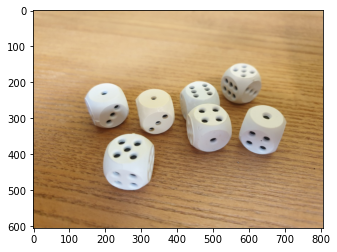

In [2]:
im = io.imread("dice_w.jpg")
bw = r2g(im)
plt.imshow(im)

In [5]:
@interact(th=(0, 5, 1), can=(0, 8, 1))
def cont(th=3, can=1):
    g = gaussian(bw, th)
    c = canny(g, can)
    c1 = c.copy()
   #cs = fc(c)
    rp = regionprops(label(c))
    f, ax = plt.subplots()
    areas = [r.area for r in rp]
    for r in rp:
        x, w, h = bbxywh(r.bbox)
        #regbound(r, ax=ax, col=scol())
        subi = c[x[1]:x[1]+h, x[0]:x[0]+w]
        ch = conhu(subi)
        c[x[1]:x[1]+h, x[0]:x[0]+w] = ch
    rp = regionprops(label(c))
    for r in rp:
        x, w, h = bbxywh(r.bbox)
        regbound(r, ax=ax, col=scol())
        
    sh(c, ax=ax)

interactive(children=(IntSlider(value=3, description='th', max=5), IntSlider(value=1, description='can', max=8…